## Sandbox with Global Jukebox Data

In [62]:
# import libraries

import pandas as pd

import plotly.express as px
import plotly.io as pio
# supress warnings
import warnings
warnings.filterwarnings('ignore')

### Load Global Jukebox Data

In [110]:

# url for csv
song_society_ids_csv = 'https://raw.githubusercontent.com/theglobaljukebox/cantometrics/refs/heads/main/raw/songs.csv'

# to pandas df
gjb_song_society = pd.read_csv(song_society_ids_csv)

# what columns?
list(gjb_song_society.columns)

['song_id',
 'Local_latitude',
 'Local_longitude',
 'Homeland_latitude',
 'Homeland_longitude',
 'Region',
 'Division',
 'Subregion',
 'Area',
 'Preferred_name',
 'Society_location',
 'society_id',
 'Audio_notes',
 'Duration',
 'Audio_file',
 'Song',
 'Genre',
 'Song_notes',
 'Performers',
 'Instruments',
 'Vocalist_gender',
 'Lyrics',
 'Recorded_by',
 'Year',
 'Publisher',
 'Publcation_collection',
 'Repository',
 'Sources',
 'Source_tag']

## How Many songs Per Region?

In [98]:

# group by to get counts per region, subregion
gjb_song_society_counts = pd.DataFrame(gjb_song_society.groupby(['Region', 'Subregion'])['song_id'].count()).reset_index()

# clean column name
gjb_song_society_counts.rename(columns={'song_id' : 'Count'}, inplace = True)
gjb_song_society_counts

,Region,Subregion,Count
0,Africa,Benin/ Ghana/ Togo,1
1,Africa,Benin/ Nigeria/ Togo,12
2,Africa,Benin/ Togo,1
3,Africa,C Sahel,2
4,Africa,C Southern Africa,14
...,...,...,...
259,Western Asia,N W Caucasus,2
260,Western Asia,Persia,9
261,Western Asia,S Arabian Peninsula,13
262,Western Asia,S Caucasus,12


## Duration of Songs by Region?

In [111]:
# look at duration column:
gjb_song_society[['Region', 'Subregion', 'Duration']]

,Region,Subregion,Duration
0,Africa,Great Lakes Africa,0:02:45
1,Africa,Great Lakes Africa,0:02:36
2,Africa,Great Lakes Africa,0:02:38
3,Africa,Great Lakes Africa,0:02:43
4,Africa,Great Lakes Africa,0:02:35
...,...,...,...
6033,Western Asia,Levant,0:00:59
6034,Western Asia,Maghreb - Berber & Semitic,NaN
6035,Western Asia,Maghreb - Berber & Semitic,NaN
6036,Western Asia,Maghreb - Berber & Semitic,0:03:25


## Cleaning Up the Durations!

In [113]:
# convert duration to milliseconds with builtin pandas function

def duration_to_ms(time_str):
    """Convert H:MM:SS to milliseconds, handling decimals"""
    if pd.isna(time_str):
        return None
    
    try:
        parts = str(time_str).split(':')
        hours = float(parts[0])
        minutes = float(parts[1])
        seconds = float(parts[2])
        
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds * 1000
    except:
        return None


# apply the function to our column
gjb_song_society['Duration_ms'] = gjb_song_society['Duration'].apply(duration_to_ms)

In [114]:
# now we can get the mean duration
gjb_dur = pd.DataFrame(gjb_song_society.groupby(['Region'])['Duration_ms'].mean().round(0)).reset_index()

gjb_dur.head()

,Region,Duration_ms
0,Africa,180459.0
1,Australia,87119.0
2,Central America,139385.0
3,Central Asia,159842.0
4,East Asia,156084.0


# overall statistics
gjb_dur.describe()

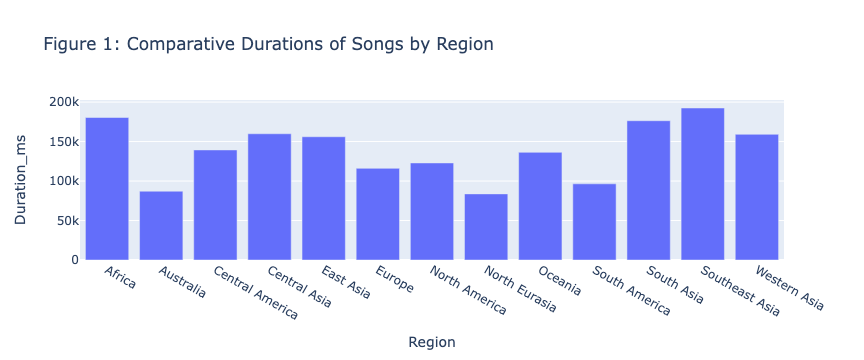

In [103]:


fig = px.bar(gjb_dur, 
             x='Region',
             y='Duration_ms', 
             labels='Region',
             title='Figure 1: Comparative Durations of Songs by Region')

fig.update_layout(barmode='group') # Set bar mode to group for side-by-side comparison, rather than stacked

# Show the figure
fig.show()

In [106]:


gjb_count = pd.DataFrame(gjb_song_society_counts.groupby(['Region'])['Count'].count().reset_index())

gjb_count

,Region,Count
0,Africa,30
1,Australia,8
2,Central America,16
3,Central Asia,10
4,East Asia,16
5,Europe,72
6,North America,26
7,North Eurasia,9
8,Oceania,18
9,South America,19


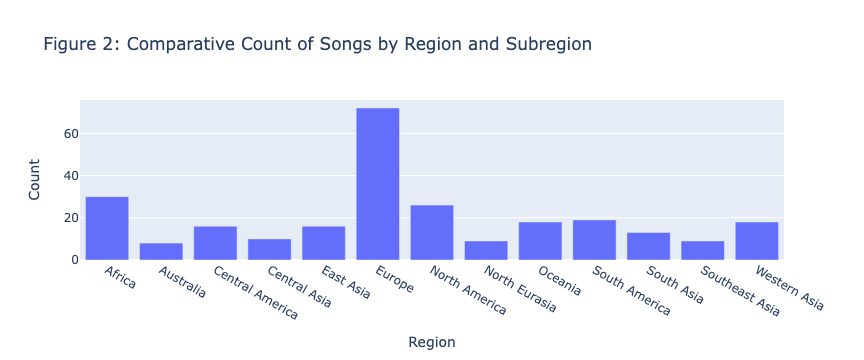

In [107]:
fig = px.bar(gjb_count, 
             x='Region',
             y='Count', 
             labels='Region',
             title='Figure 2: Comparative Count of Songs by Region and Subregion')

fig.update_layout(barmode='group') # Set bar mode to group for side-by-side comparison, rather than stacked

# Show the figure
fig.show()

In [108]:
gjb_combined = pd.merge(gjb_dur, gjb_count)


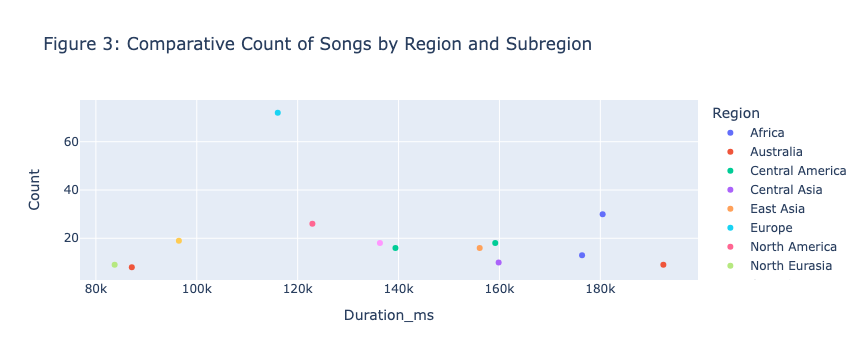

In [109]:
fig = px.scatter(gjb_combined, 
             x='Duration_ms',
             y='Count', 
             color='Region',
             title='Figure 3: Comparative Count of Songs by Region and Subregion')


# Show the figure
fig.show()